In [ ]:
import torch
import torch.nn as nn
import torchaudio
import matplotlib.pyplot as plt
from IPython.display import Audio
!uv pip install torchcodec -q

In [ ]:
audio_clip_path = "audio.mp3"
audio, sampling_rate = torchaudio.load(audio_clip_path)

In [ ]:
print(audio)
print(sampling_rate)
print(audio.shape)

tensor([[ 0.0000e+00,  2.4281e-12, -1.7215e-11,  ..., -2.5306e-08,
         -3.3002e-09, -1.3011e-08],
        [ 0.0000e+00,  2.8775e-12, -1.6963e-11,  ...,  1.9682e-08,
          1.5737e-08,  7.7728e-09]])
48000
torch.Size([2, 258048])


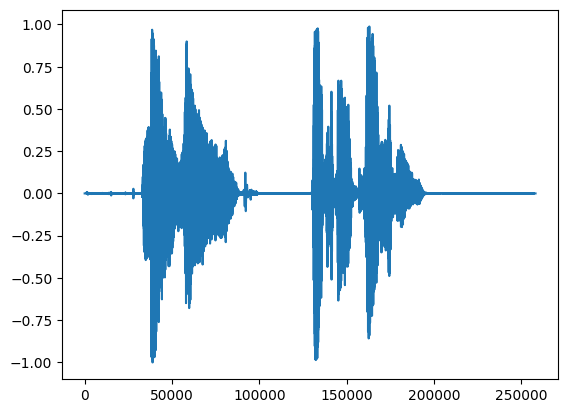

In [ ]:
mono_audio = audio.mean(dim=0)
plt.plot(mono_audio)

In [ ]:
import numpy as np
t = np.linspace(1, 100,100, endpoint=False, )
print(len(t))
print(t)

100
[ 1.    1.99  2.98  3.97  4.96  5.95  6.94  7.93  8.92  9.91 10.9  11.89
 12.88 13.87 14.86 15.85 16.84 17.83 18.82 19.81 20.8  21.79 22.78 23.77
 24.76 25.75 26.74 27.73 28.72 29.71 30.7  31.69 32.68 33.67 34.66 35.65
 36.64 37.63 38.62 39.61 40.6  41.59 42.58 43.57 44.56 45.55 46.54 47.53
 48.52 49.51 50.5  51.49 52.48 53.47 54.46 55.45 56.44 57.43 58.42 59.41
 60.4  61.39 62.38 63.37 64.36 65.35 66.34 67.33 68.32 69.31 70.3  71.29
 72.28 73.27 74.26 75.25 76.24 77.23 78.22 79.21 80.2  81.19 82.18 83.17
 84.16 85.15 86.14 87.13 88.12 89.11 90.1  91.09 92.08 93.07 94.06 95.05
 96.04 97.03 98.02 99.01]


100
[ 1.    1.99  2.98  3.97  4.96  5.95  6.94  7.93  8.92  9.91 10.9  11.89
 12.88 13.87 14.86 15.85 16.84 17.83 18.82 19.81 20.8  21.79 22.78 23.77
 24.76 25.75 26.74 27.73 28.72 29.71 30.7  31.69 32.68 33.67 34.66 35.65
 36.64 37.63 38.62 39.61 40.6  41.59 42.58 43.57 44.56 45.55 46.54 47.53
 48.52 49.51 50.5  51.49 52.48 53.47 54.46 55.45 56.44 57.43 58.42 59.41
 60.4  61.39 62.38 63.37 64.36 65.35 66.34 67.33 68.32 69.31 70.3  71.29
 72.28 73.27 74.26 75.25 76.24 77.23 78.22 79.21 80.2  81.19 82.18 83.17
 84.16 85.15 86.14 87.13 88.12 89.11 90.1  91.09 92.08 93.07 94.06 95.05
 96.04 97.03 98.02 99.01]


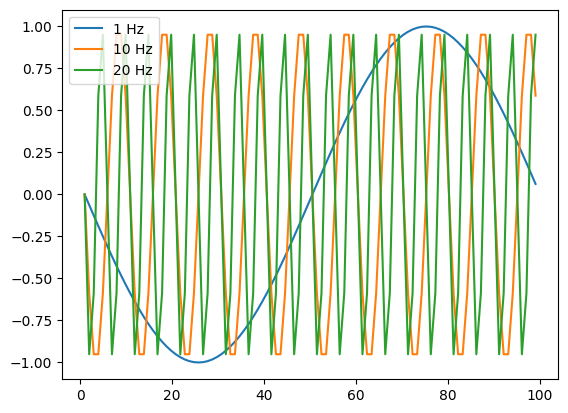

In [ ]:
import numpy as np
t = np.linspace(1, 100,100, endpoint=False, )
print(len(t))
print(t)

for f in [1,10,20]:
  y = np.sin(2 * np.pi * f * t)
  plt.plot(t, y, label=f"{f} Hz")

plt.legend()
plt.show()

y_fft = np.fft.fft(y)


In [ ]:
Audio(audio_clip_path, rate=sampling_rate)

torch.Size([80, 337])


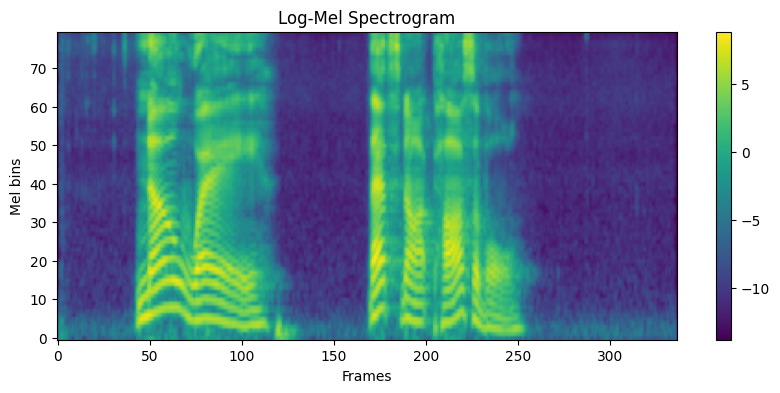

In [ ]:
import torch
import torchaudio
import matplotlib.pyplot as plt

def load_audio(path, target_sr=None):
    # returns tensor shape [channels, samples], sample_rate (int)
    audio, sr = torchaudio.load(path)  # works with WAV; use soundfile for MP3 if needed
    if target_sr and sr != target_sr:
        audio = torchaudio.functional.resample(audio, orig_freq=sr, new_freq=target_sr)
        sr = target_sr
    return audio, sr

def to_mono(audio):
    # audio: [channels, samples] -> [samples]
    if audio.shape[0] == 1:
        return audio.squeeze(0)
    return audio.mean(dim=0)

def mel_from_audio_torchaudio(audio, sr, n_fft=2048, hop_length=512, n_mels=128, f_min=0.0, f_max=None):
    """
    audio: 1-D torch tensor (samples,)
    returns: mel_spec (torch.Tensor) shape [n_mels, time_frames]
    """
    if f_max is None:
        f_max = sr // 2
    mel_transform = torchaudio.transforms.MelSpectrogram(
        sample_rate=sr,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels,
        f_min=f_min,
        f_max=f_max,
        power=2.0,  # power spectrogram (amplitude^2)
    )
    mel = mel_transform(audio)  # [n_mels, time]
    # convert to log scale (log-mel)
    log_mel = torch.log(mel + 1e-6)
    return log_mel

# Example usage
audio, sr = load_audio("audio.mp3", target_sr=16000)   # use WAV or convert MP3
mono = to_mono(audio)                                  # [samples]
log_mel = mel_from_audio_torchaudio(mono, sr, n_fft=1024, hop_length=256, n_mels=80)
print(log_mel.shape)  # -> (n_mels, time_frames)

# Plot (visual)
plt.figure(figsize=(10, 4))
plt.imshow(log_mel.numpy(), aspect='auto', origin='lower', cmap="viridis")
plt.title("Log-Mel Spectrogram")
plt.xlabel("Frames")
plt.ylabel("Mel bins")
plt.colorbar()
plt.show()